In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [211]:
df = pd.read_csv("Dataset/titanic.csv")
test_df = pd.read_csv("Dataset/test.csv")

In [212]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [213]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [215]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) #male = 0, female = 1
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2}) #S = 0, C = 1, Q = 2

In [216]:
df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


<Axes: >

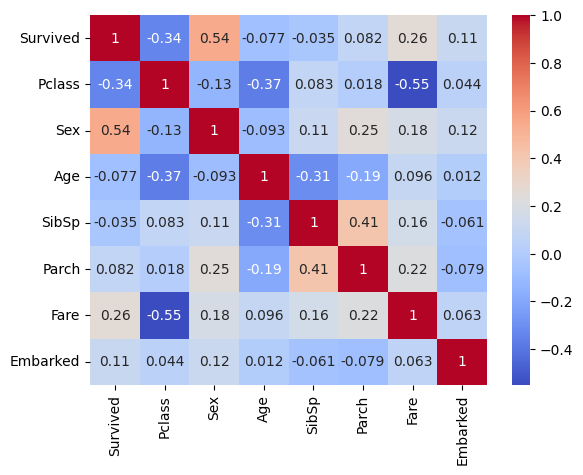

In [217]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap = "coolwarm", annot = True)

### Handling Missing values

In [218]:
from sklearn.linear_model import LinearRegression

# Split the dataset into features and target variables
X_train = df[df['Age'].notnull()][['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
y_train = df[df['Age'].notnull()]['Age']
X_predict = df[df['Age'].isnull()][['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]

# Train the linear regression model
model_age_pred = LinearRegression()
model_age_pred.fit(X_train, y_train)

# Predict missing values and fill them directly
predicted_ages = model_age_pred.predict(X_predict)
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages


In [219]:
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into features and target variables
X_train = df[df['Embarked'].notnull()][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = df[df['Embarked'].notnull()]['Embarked']
X_predict = df[df['Embarked'].isnull()][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict missing values and fill them directly
predicted_embarked = model.predict(X_predict)
df.loc[df['Embarked'].isnull(), 'Embarked'] = predicted_embarked

In [220]:
#df.drop(["SibSp", "Parch"], axis = 1, inplace = True)
#df.info()

In [221]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,19.427101,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


In [222]:
## count null 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [223]:

#df["Age"] = df["Age"].fillna(df["Age"].mean())

In [224]:
df.shape

(891, 8)

In [225]:
df.dropna(inplace = True)

In [226]:
df.shape

(891, 8)

In [227]:
df.isnull().sum(axis=0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

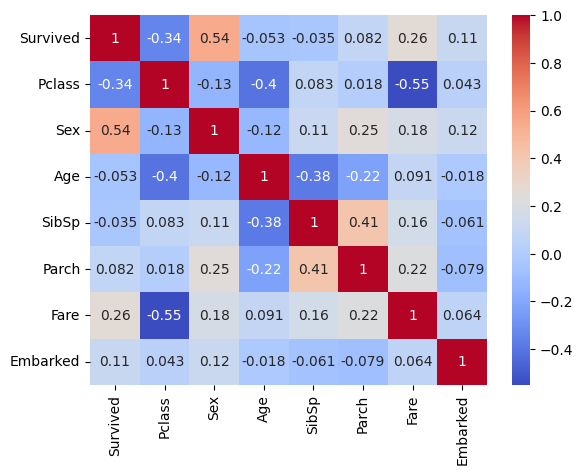

In [228]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap = "coolwarm", annot = True)

In [229]:
# Feature Selection
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [231]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
# prediction
y_pred = rfc.predict(X_test)

In [233]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8268156424581006
[[92 13]
 [18 56]]


In [234]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8044692737430168
[[90 15]
 [20 54]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.664804469273743
[[99  6]
 [54 20]]


In [236]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7206703910614525
[[88 17]
 [33 41]]


In [237]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.776536312849162
[[86 19]
 [21 53]]


In [238]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7486033519553073
[[81 24]
 [21 53]]


In [239]:
# Neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7932960893854749
[[88 17]
 [20 54]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [240]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8044692737430168
[[89 16]
 [19 55]]


In [241]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.776536312849162
[[86 19]
 [21 53]]


### Highest Correlation is coming from Random Forest Model

In [242]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [243]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [244]:
passID = test_df["PassengerId"]

In [245]:
test_df.drop(["PassengerId","Name","Ticket","Cabin"],axis =1 , inplace = True)

In [246]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [247]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [248]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [249]:
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1}) #male = 0, female = 1
test_df["Embarked"] = test_df["Embarked"].map({"S": 0, "C": 1, "Q": 2}) #S = 0, C = 1, Q = 2

In [250]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [251]:
X_predict = test_df[test_df['Age'].isnull()][['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]

# Predict missing values and fill them directly
predicted_ages = model_age_pred.predict(X_predict)
test_df.loc[test_df['Age'].isnull(), 'Age'] = predicted_ages

In [252]:
rfc = XGBClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(test_df)
final_y = y_pred

In [253]:
final_y = np.array(final_y)

In [254]:
df_predict = pd.DataFrame({"PassengerId": passID, "Survived": final_y})

In [255]:
# convert to csv
df_predict.to_csv("./submission.csv", index = False)